**Introduction**

Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen and nutrients for its correct functioning. The other way around, the brain is not able to drain and expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is in a critical condition as brain cells will imminently begin to die.
The American Stroke Association indicates that stroke is the fifth cause of death and disability in the United States. For this reason, stroke is considered a severe disease and has been the subject of extensive research, not only in the medical field but also in data science and machine learning studies.

In [865]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sma
import statsmodels.formula.api as sfa
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression,ElasticNet, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector, RFE, f_oneway, chi2
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

pd.options.display.max_columns = None # display all columns of the dataframe

pd.options.display.max_rows = None # display all rows of the dataframe

pd.options.display.float_format = '{:.6f}'.format # to display the float values upto 6 decimal places

plt.rcParams['figure.figsize'] = [15,8]

print("DONE")

DONE


In [866]:
# 1. Read the dataset and view the first 10 rows of it.

df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,NaN,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
5,56669,Male,81.000000,0,0,Yes,Private,Urban,186.210000,29.000000,formerly smoked,1
6,53882,Male,74.000000,1,1,Yes,Private,Rural,70.090000,27.400000,never smoked,1
7,10434,Female,69.000000,0,0,No,Private,Urban,94.390000,22.800000,never smoked,1
8,27419,Female,59.000000,0,0,Yes,Private,Rural,76.150000,NaN,Unknown,1
9,60491,Female,78.000000,0,0,Yes,Private,Urban,58.570000,24.200000,Unknown,1


**Data Description**

a) Id - Unique Id 

b) gender

c) age

d) hypertension - Binary Feature 

e)Heart_disease - Binary Feature

f) Ever_married - Has the patient ever been married 

g)Work_type - Work type of a patient 

h)Residency_type - Residency type 
of patient

i) avg_glucose_level - Average Glucose level in the blood 

j)bmi - Body mass Index

k) smoking_status - Smoking status of the patient 

l)stroke - stroke event

In [867]:
# 2. Check the shape/dimension of the dataset

df_stroke.shape

(5110, 12)

In [868]:
# 3. Check for the missing values.Display number of missing values per column.

df_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing values in bmi column alone

In [869]:
# 4. Investigate and predict the missing BMI Value.

bmi_map = df_stroke.groupby('gender')['bmi'].median()
ind = df_stroke[df_stroke.bmi.isnull()].index.tolist()

In [870]:
df_stroke.loc[ind,'bmi'] = df_stroke['gender'].map(bmi_map)
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,27.800000,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1


Filled null based on gender and took the median bmi of each gender and mapped it to the null values

In [871]:
# 5. Check the datatype, number of non null values and name of each variable in the dataset.
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are no null values in the dataset

In [872]:
# 6. Check the descriptive statistics of the dataset.

df_stroke.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.000000,36517.829354,21161.721625,67.000000,17741.250000,36932.000000,54682.000000,72940.000000
age,5110.000000,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
hypertension,5110.000000,0.097456,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.000000,0.054012,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,5110.000000,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
bmi,5110.000000,28.862446,7.699752,10.300000,23.800000,28.100000,32.800000,97.600000
stroke,5110.000000,0.048728,0.215320,0.000000,0.000000,0.000000,0.000000,1.000000


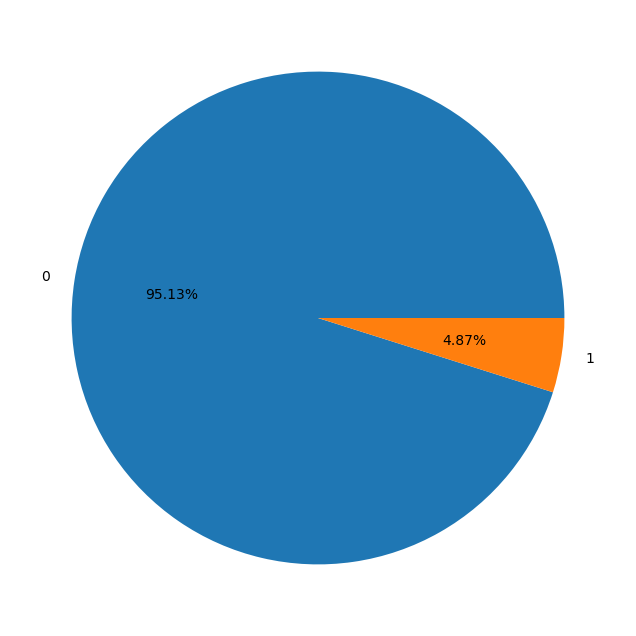

In [873]:
# 7. Visualize the proportion of Stroke samples in the dataset.

plt.pie(df_stroke['stroke'].value_counts().values, labels = df_stroke['stroke'].value_counts().index, autopct = '%.2f%%')
plt.show()

Proportion of people having stroke is 4.87%

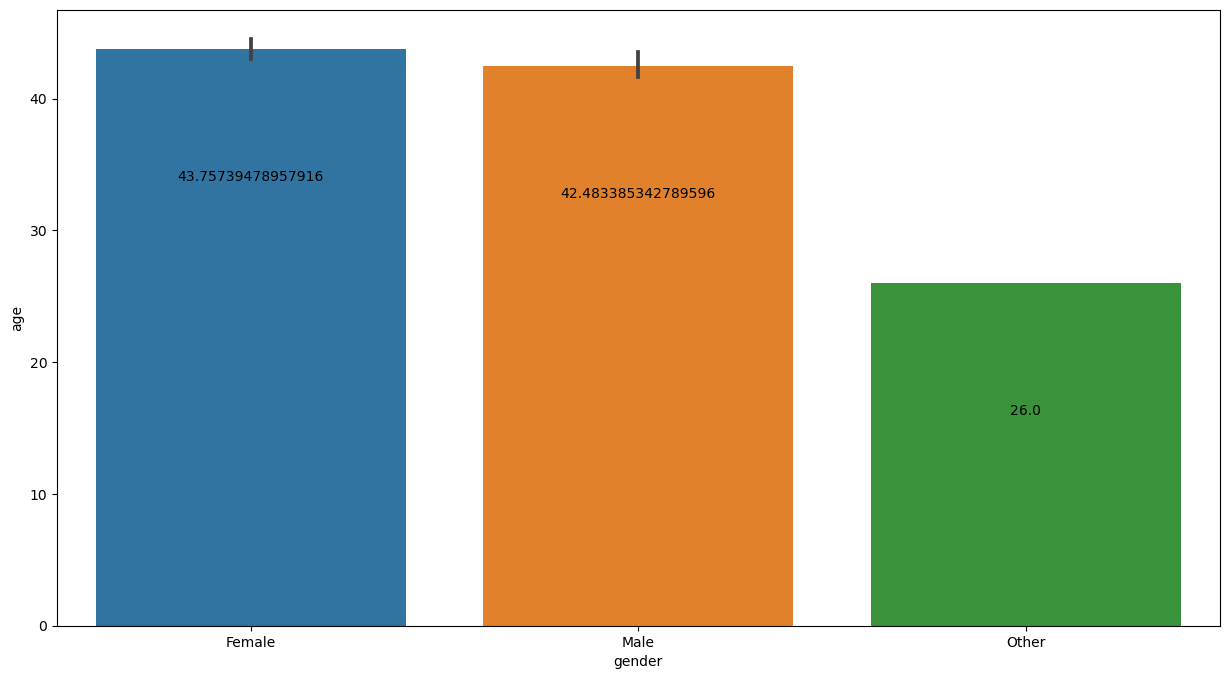

In [874]:
# 8. Visualize the Distribution of Male and Female Ages. Write the Observation.

sns.barplot( x = df_stroke['gender'].sort_values(), y = df_stroke['age'])
for i , v in enumerate(df_stroke.groupby('gender')['age'].mean()):
    plt.text(i,v - 10,str(v), ha = 'center')
plt.show()

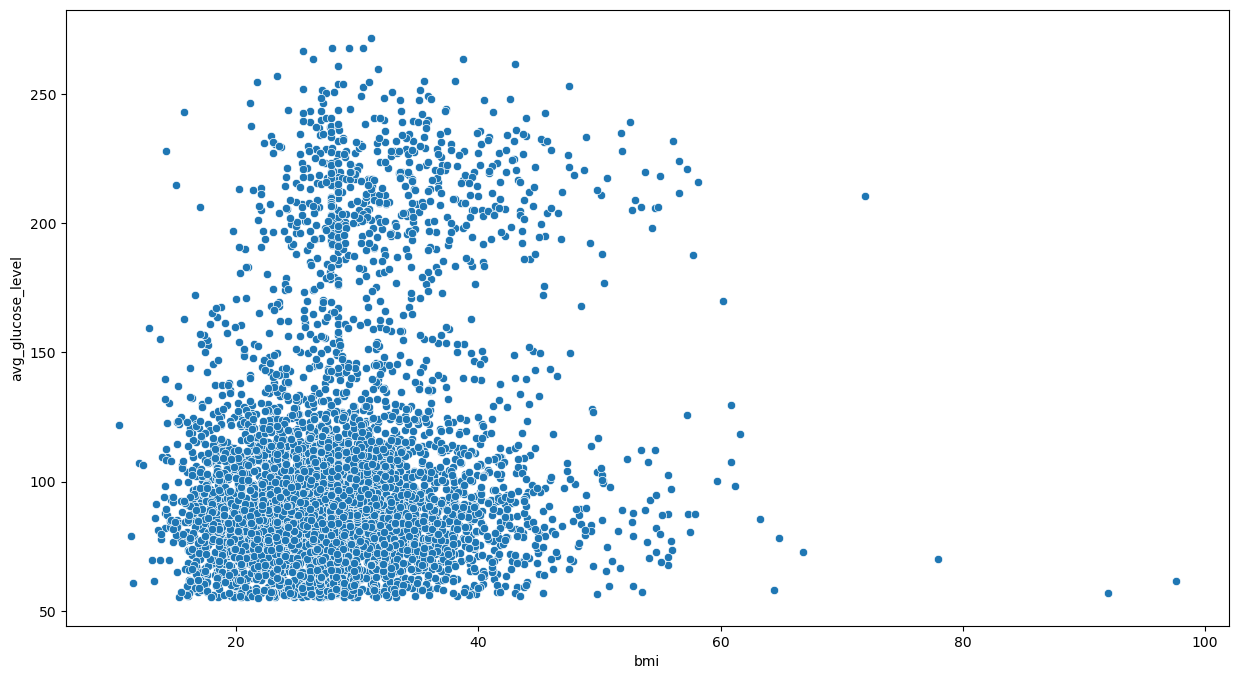

In [875]:
# 10.Visualize the stroke sample based on
# a) BMI and Glucose Level

sns.scatterplot(df_stroke.bmi, df_stroke.avg_glucose_level)
plt.show()

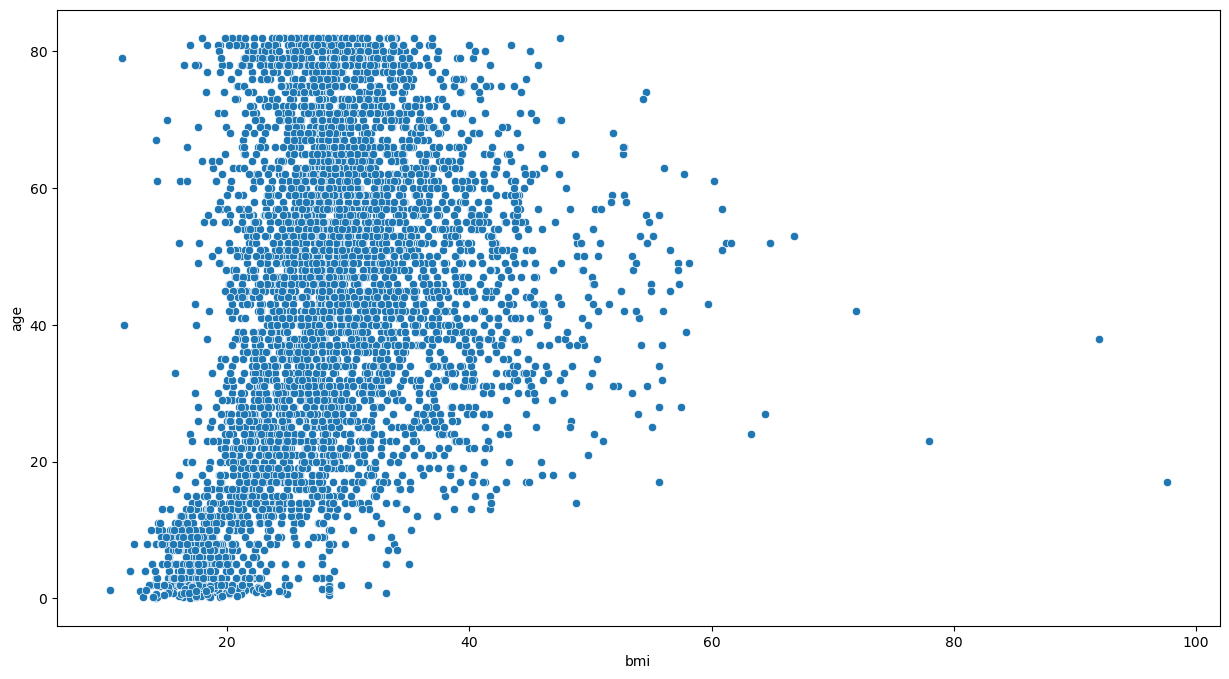

In [876]:
# b) BMI and Age

sns.scatterplot(df_stroke.bmi, df_stroke.age)
plt.show()

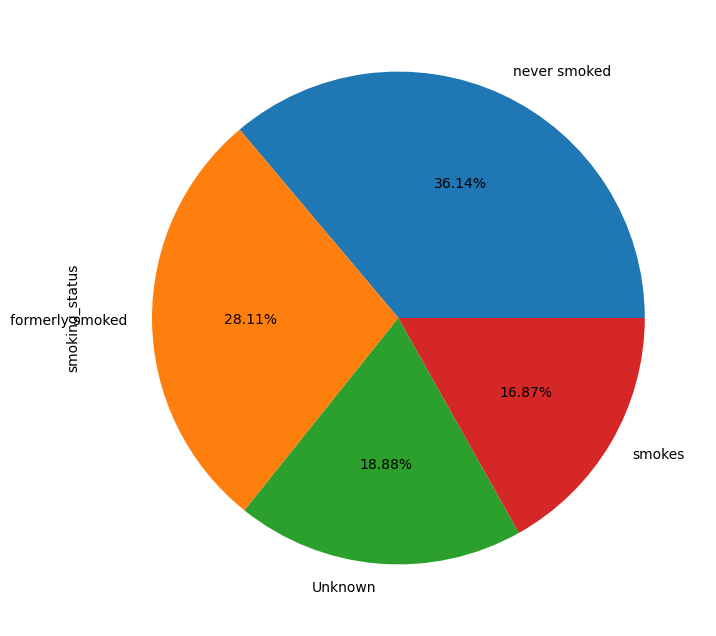

In [877]:
# 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

df_stroke[(df_stroke.stroke == 1)]['smoking_status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.show()

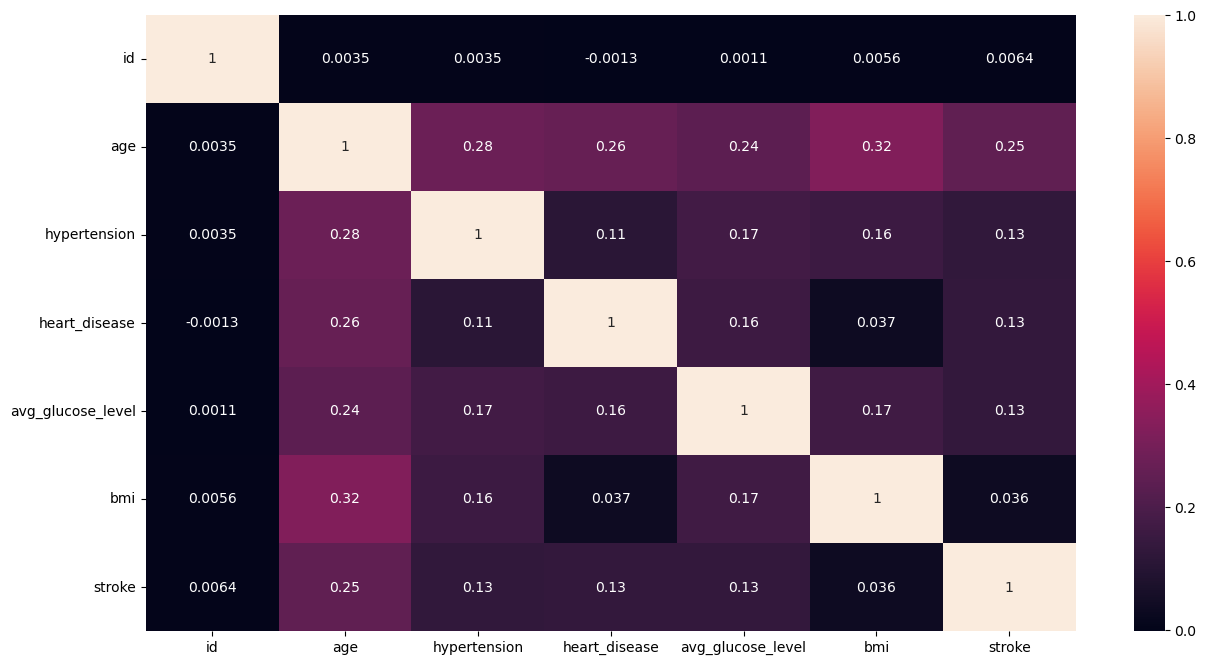

In [878]:
# 12. Perform hypothesis testing to find the significant variables.

### H0 : The variable is insignificant (there is no relationship between y and x variables)
### Ha : The variable is significant (there is relationship between y and x variables)

sns.heatmap(df_stroke.corr(), annot= True)
plt.show()

ID is insignificant we can drop that column

In [879]:
# 13. Drop the unnecessary columns.

df_stroke.drop('id', axis = 1, inplace=True)
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,27.800000,never smoked,1
2,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1


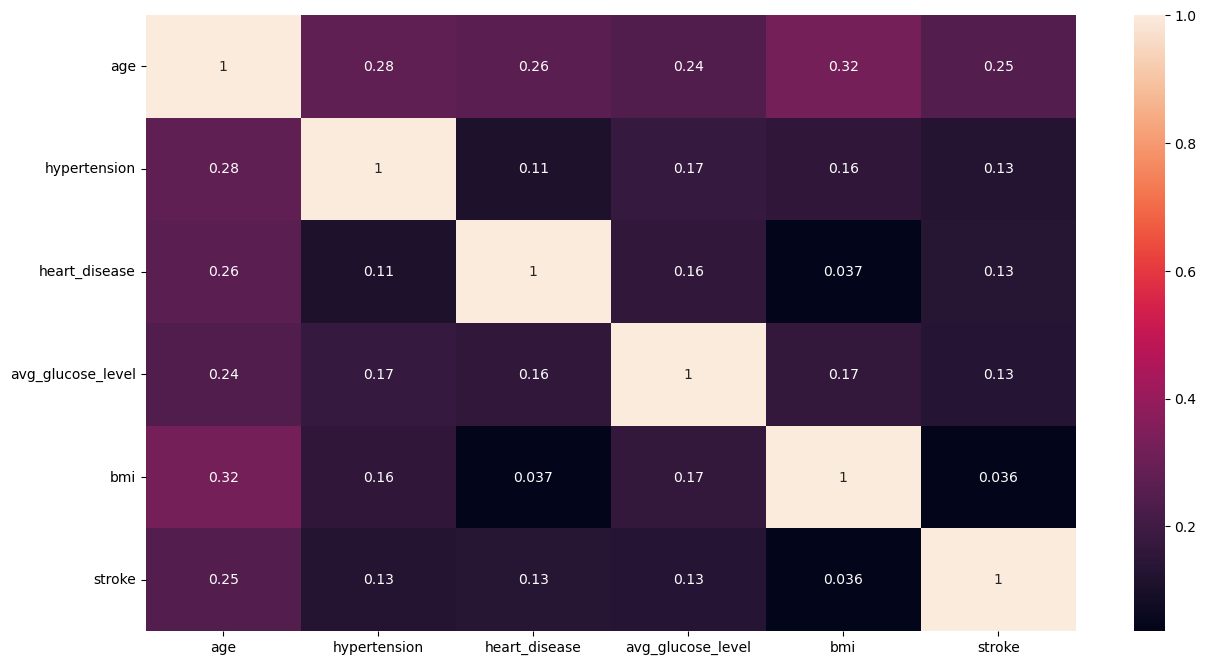

In [880]:
sns.heatmap(df_stroke.corr(),annot=True)
plt.show()

In [881]:
# 14. Write the code to replace following categories columns in integer format as follow –
# a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
# b) ever_married('Yes': 1, 'No': 0)
# c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

df_stroke.work_type.replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':1,'Never_worked': -2}, inplace=True)
df_stroke.ever_married.replace({'Yes': 1, 'No': 0}, inplace= True)
df_stroke.smoking_status.replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}, inplace=True)

In [882]:
df_stroke[['work_type','ever_married', 'smoking_status']].head()

,work_type,ever_married,smoking_status
0,0,1,2
1,1,1,0
2,0,1,0
3,0,1,-1
4,1,1,0


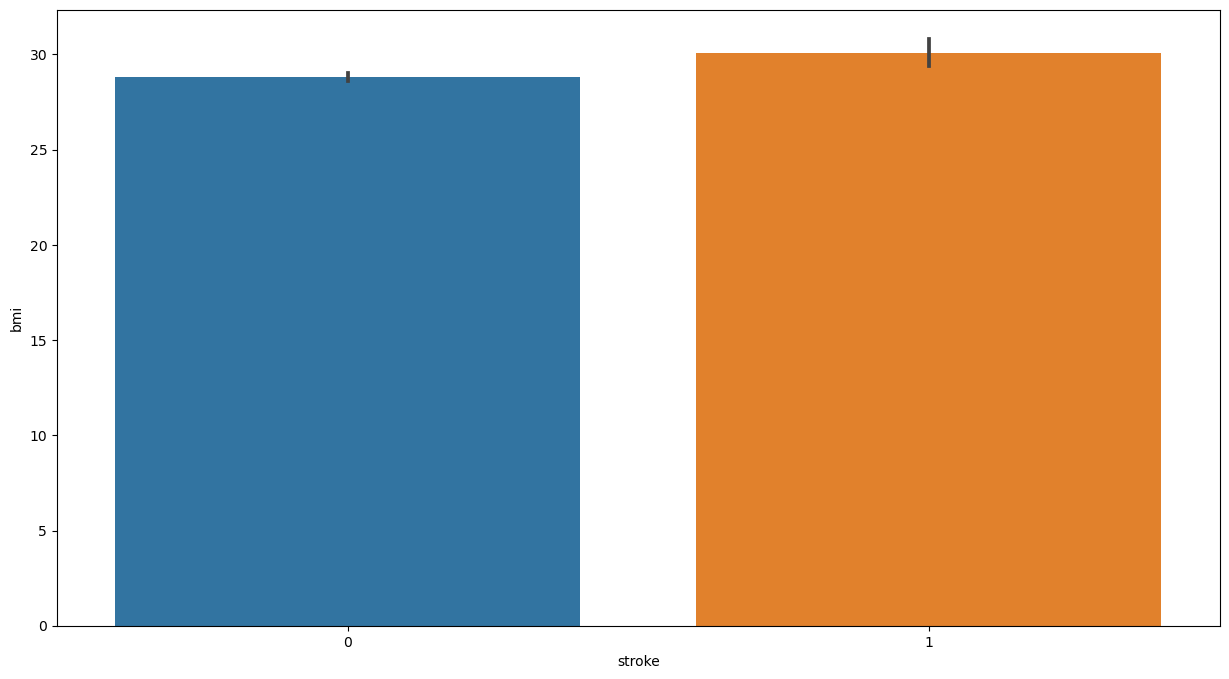

In [883]:
# 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

sns.barplot(y = df_stroke.bmi, x = df_stroke.stroke)
plt.show()

In [884]:
df_stroke.groupby('stroke')['bmi'].mean()

stroke
0   28.799671
1   30.087952
Name: bmi, dtype: float64

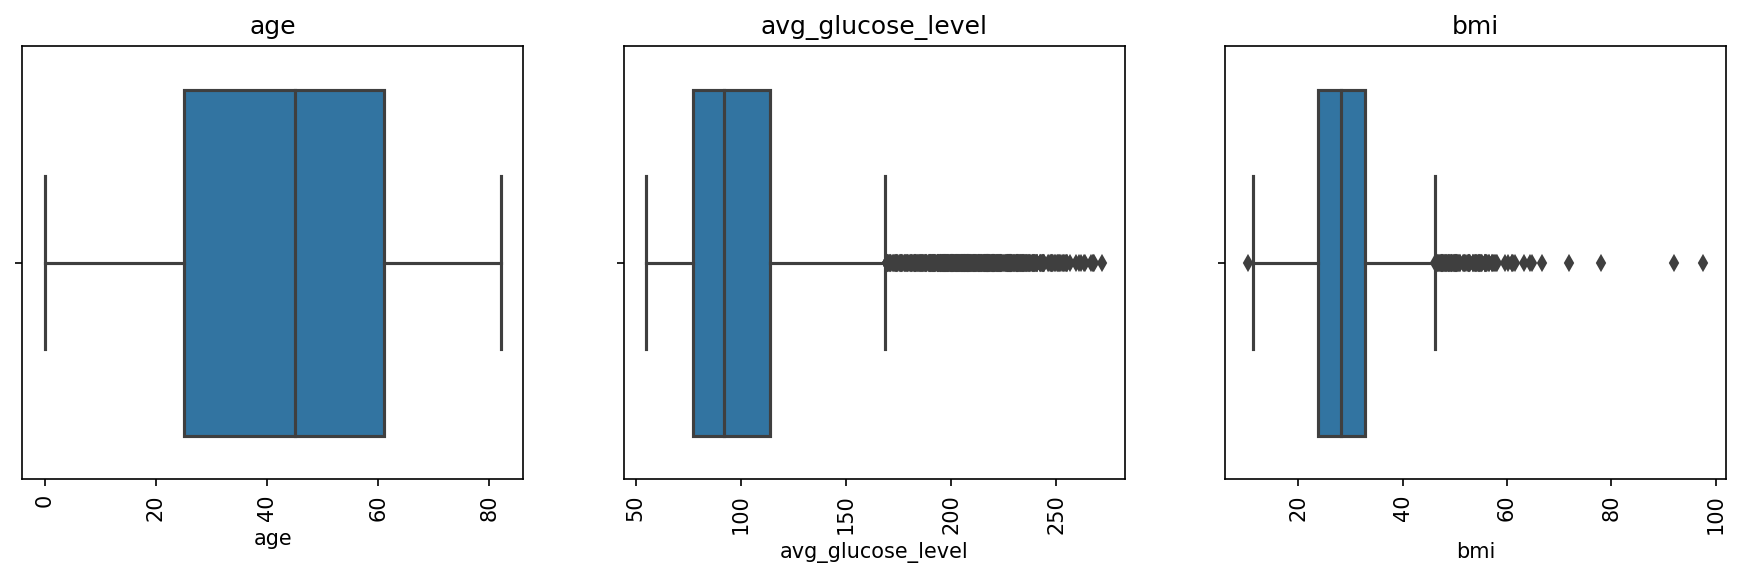

In [891]:
fig = plt.figure(figsize=(25, 15), dpi = 150)
df_num = df_stroke[['age','avg_glucose_level','bmi']]

for i, col in enumerate(df_num.columns):
    ax = fig.add_subplot(3,5, i+1)
    sns.boxplot(df_num[col], ax = ax)
    ax.set_title(col)
    plt.xticks(rotation = 90)

fig.subplots_adjust(hspace=0.5)
plt.show()

In [831]:
# 16. List down columns that are highly skewed.

df_stroke.skew()[(df_stroke.skew() > 0.5) | (df_stroke.skew() < -0.5)].index

Index(['hypertension', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

In [832]:
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.000000,0,1,1,0,Urban,228.690000,36.600000,2,1
1,Female,61.000000,0,0,1,1,Rural,202.210000,27.800000,0,1
2,Male,80.000000,0,1,1,0,Rural,105.920000,32.500000,0,1
3,Female,49.000000,0,0,1,0,Urban,171.230000,34.400000,-1,1
4,Female,79.000000,1,0,1,1,Rural,174.120000,24.000000,0,1


In [833]:
df_stroke.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.679586
avg_glucose_level    1.572284
bmi                  1.087931
smoking_status       0.082279
stroke               4.193284
dtype: float64

In [834]:
# 17. List down the columns that are highly kurtosis.

df_stroke.kurt()[(df_stroke.kurt() > 3)].index

Index(['hypertension', 'heart_disease', 'bmi', 'stroke'], dtype='object')

In [835]:
df_stroke.gender.replace({'Male': 1, 'Female': 0, 'Other': 2}, inplace = True)
df_stroke.Residence_type.replace({'Urban':1, 'Rural': 0}, inplace = True)

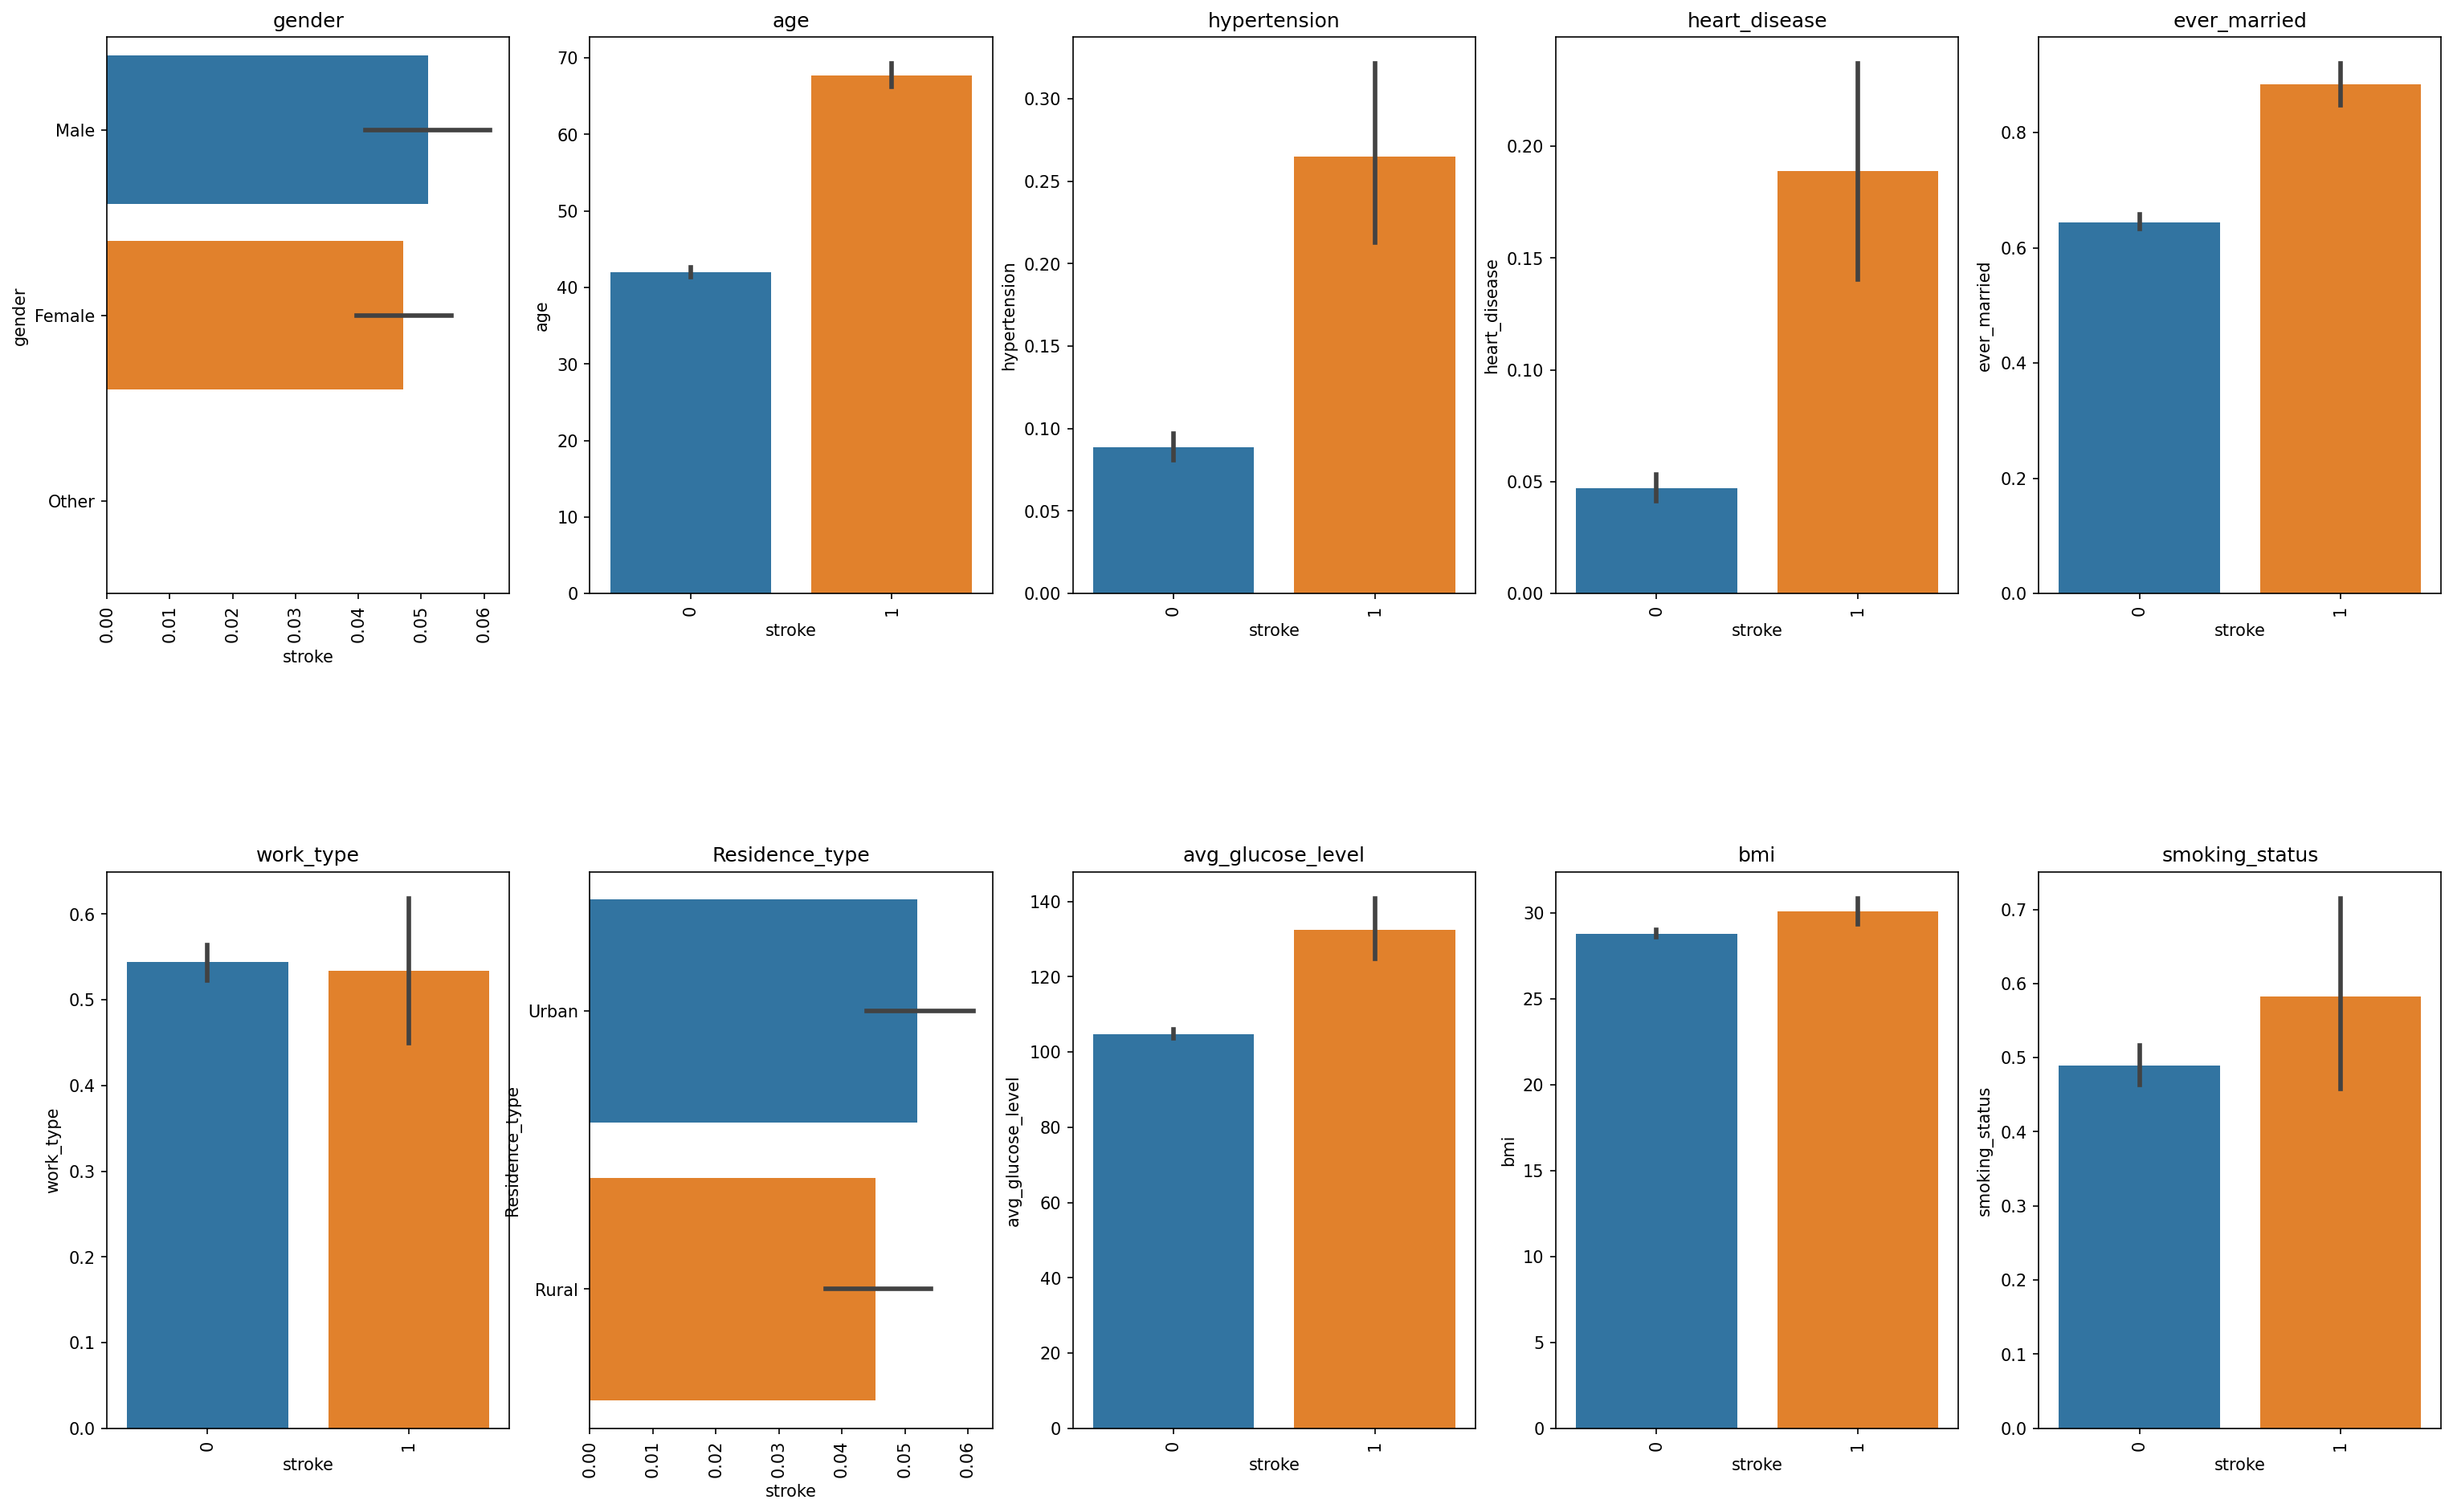

In [903]:
# 18. Find the distribution of all variables with respect to the outcome 'stroke' variable

fig = plt.figure(figsize=(25, 15), dpi = 150)

for i, col in enumerate(df_stroke.drop('stroke', axis = 1).columns):
    ax = fig.add_subplot(2,5, i+1)
    sns.barplot(x = df_stroke.stroke,y = df_stroke[col], ax = ax)
    ax.set_title(col)
    plt.xticks(rotation = 90)

fig.subplots_adjust(hspace=0.5)
plt.show()

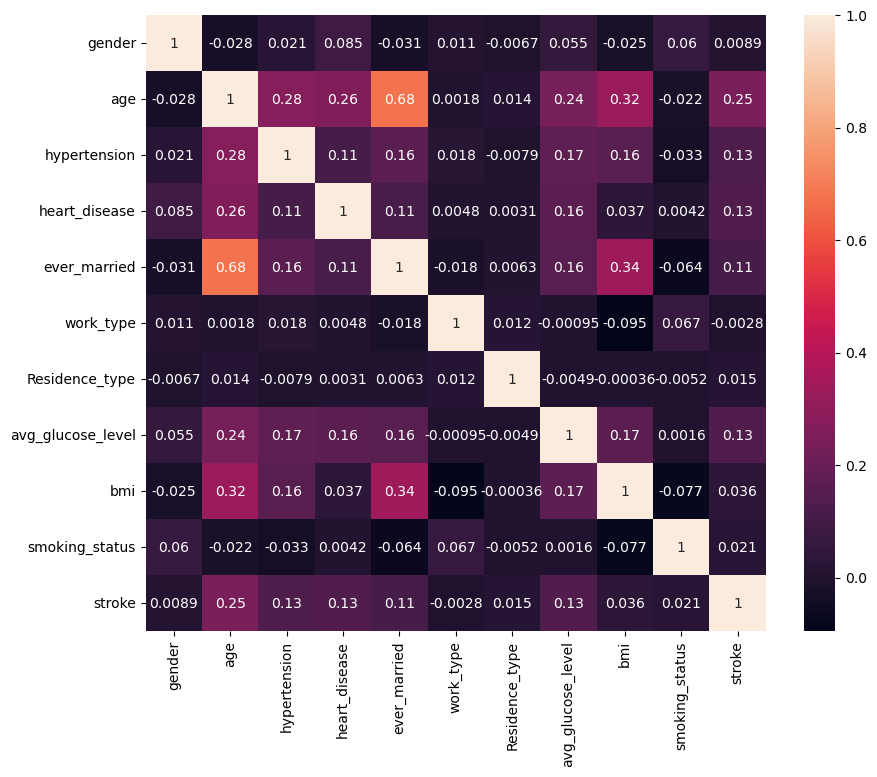

In [837]:
# 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation. 
# Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)

plt.figure(figsize=(10,8))
sns.heatmap(df_stroke.corr(), annot = True)
plt.show()

There are no highly correlated variables

In [838]:
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,0,1,228.690000,36.600000,2,1
1,0,61.000000,0,0,1,1,0,202.210000,27.800000,0,1
2,1,80.000000,0,1,1,0,0,105.920000,32.500000,0,1
3,0,49.000000,0,0,1,0,1,171.230000,34.400000,-1,1
4,0,79.000000,1,0,1,1,0,174.120000,24.000000,0,1


In [839]:
# 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.

X = df_stroke.drop('stroke', axis = 1)
y = df_stroke.stroke

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=10)

In [840]:
skewed = ['avg_glucose_level', 'bmi']

pt = PowerTransformer(method='yeo-johnson')

pt.fit(xtrain[['avg_glucose_level', 'bmi']])

# transforming xtrain and xtest 
xtrain[['avg_glucose_level', 'bmi']] = pt.transform(xtrain[['avg_glucose_level', 'bmi']])
xtest[['avg_glucose_level', 'bmi']] = pt.transform(xtest[['avg_glucose_level', 'bmi']])

print('xtrain:',xtrain.shape,'xtest:',xtest.shape, sep = '\n' )

xtrain:
(3577, 10)
xtest:
(1533, 10)


In [841]:
# 21. Check the dataset is balanced or imbalanced. 
# If it is highly investigated, a different approach to balanced the dataset by using the correct technique.

ytrain.value_counts(normalize=True)

0   0.952754
1   0.047246
Name: stroke, dtype: float64

In [842]:
ytest.value_counts(normalize=True)

0   0.947815
1   0.052185
Name: stroke, dtype: float64

The data is imbalance highly, we will synthesize the data

In [843]:
print('ytrain:',ytrain.shape,'ytest:',ytest.shape, sep = '\n' )

ytrain:
(3577,)
ytest:
(1533,)


In [844]:
from imblearn.over_sampling import SMOTE

# use SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled dataset shape:", Counter(y_resampled))

Resampled dataset shape: Counter({1: 4861, 0: 4861})


In [845]:
xtrain, xtest, ytrain, ytest = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=10)
print('xtrain:',xtrain.shape,'xtest:',xtest.shape, sep = '\n' )

xtrain:
(6805, 10)
xtest:
(2917, 10)


In [846]:
ss = StandardScaler()

ss.fit(xtrain)

xtrain = pd.DataFrame(ss.transform(xtrain), columns = xtrain.columns)
xtest = pd.DataFrame(ss.transform(xtest), columns = xtest.columns)

print('New xtrain after smoting, transforming, scaling:',xtrain.shape,
      'New xtest after smoting, transforming, scaling:',xtest.shape, sep = '\n')

ytrain = ytrain.reset_index(drop = True)
ytest = ytest.reset_index(drop = True)

New xtrain after smoting, transforming, scaling:
(6805, 10)
New xtest after smoting, transforming, scaling:
(2917, 10)


In [847]:
print('New ytrain:',ytrain.shape,'New ytest:',ytest.shape, sep = '\n' )

New ytrain:
(6805,)
New ytest:
(2917,)


In [848]:
print('New ytrain:', ytrain.value_counts(normalize=True)*100, 'New ytest:', ytest.value_counts(normalize=True)*100, sep = '\n')

New ytrain:
1   50.242469
0   49.757531
Name: stroke, dtype: float64
New ytest:
0   50.565650
1   49.434350
Name: stroke, dtype: float64


Now the data is balanced and we can proceed model building

In [849]:
# 22. Model Selection/hyperparameter tuning
# - Try different models and fine tune their performance until you get the desired level of performance 
    # on the given dataset.
# Model Evaluation
# - Evaluate the models using appropriate evaluation metrics.

In [850]:
# statistical model of logistic regression

logreg_stats_model = sma.Logit(ytrain,sma.add_constant(xtrain)).fit()

ypred_prob = logreg_stats_model.predict(sma.add_constant(xtest))

ypred_point5 = [0 if x < 0.5 else 1 for x in ypred_prob]

print('Summary:',logreg_stats_model.summary(),'_____________________________________________________________________________________',
      'Classification report with threshold of 0.5:', classification_report(ytest,ypred_point5), sep = '\n\n')
%time

Optimization terminated successfully.
         Current function value: 0.402084
         Iterations 7
Summary:

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 6805
Model:                          Logit   Df Residuals:                     6794
Method:                           MLE   Df Model:                           10
Date:                Fri, 05 May 2023   Pseudo R-squ.:                  0.4199
Time:                        12:25:45   Log-Likelihood:                -2736.2
converged:                       True   LL-Null:                       -4716.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1957      0.037     -5.323      0.000      -0.268      -0.12

All variable's pvalue are less than 0.05 which means all are significant, and no need to drop the variables

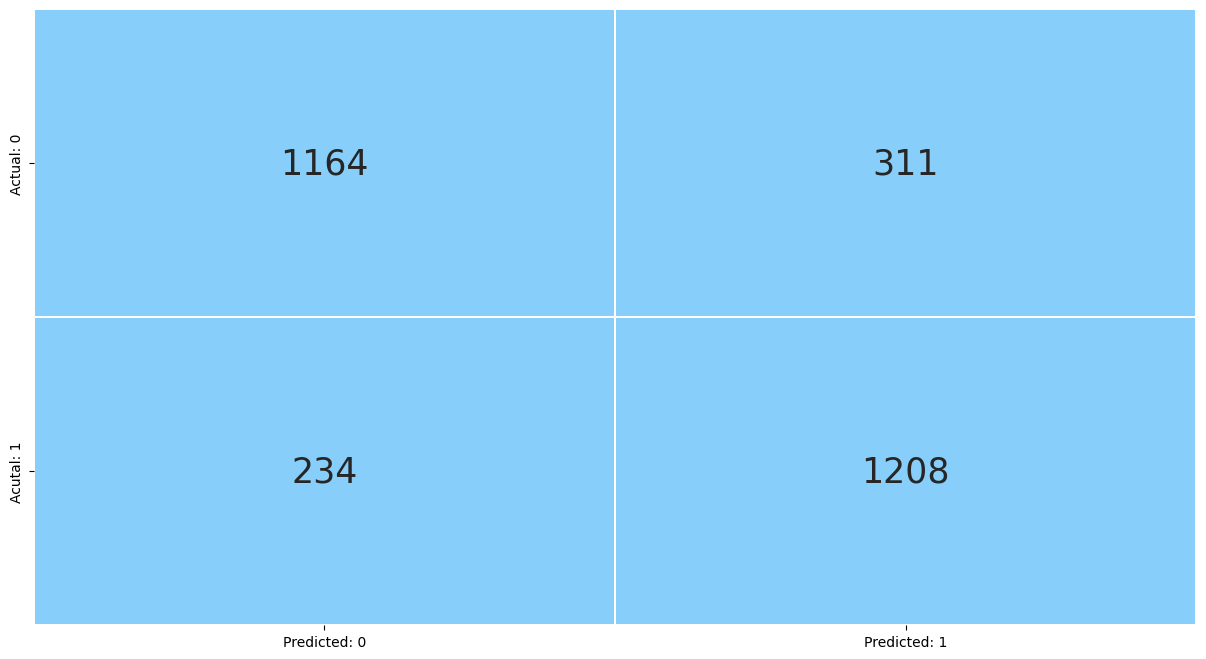

Wall time: 0 ns


In [851]:
# Confusion matrix for 0.5 threshold

cm = confusion_matrix(ytest,ypred_point5)

conf_matrix = pd.DataFrame(cm, columns = ['Predicted: 0','Predicted: 1' ], index = ['Actual: 0','Acutal: 1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, linewidths= 0.1, 
           annot_kws= {'size':25})

plt.show()

%time

In [852]:
# youden's index

fpr,tpr,thresholds = roc_curve(ytest, ypred_prob)

youdens_table = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Thresholds':thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

youdens_table = youdens_table.sort_values(by = 'Difference', ascending = False).reset_index(drop = True)

youdens_table.head(10)

,TPR,FPR,Thresholds,Difference
0,0.826630,0.196610,0.520514,0.630020
1,0.825243,0.195932,0.521685,0.629311
2,0.827323,0.198644,0.518856,0.628679
3,0.825243,0.196610,0.521654,0.628633
4,0.826630,0.198644,0.519466,0.627986
5,0.821082,0.193220,0.532487,0.627861
6,0.838419,0.210847,0.499845,0.627571
7,0.821775,0.194576,0.525904,0.627199
8,0.819695,0.192542,0.533506,0.627152
9,0.834258,0.207458,0.505708,0.626800


In [853]:
# will change the threshold to see the performance of the model

ypred_point43 = [0 if x < 0.43 else 1 for x in ypred_prob]

print('Summary:',logreg_stats_model.summary(),'_____________________________________________________________________________________',
      'Classification report with threshold of 0.43:', classification_report(ytest,ypred_point43), sep = '\n\n')

Summary:

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 6805
Model:                          Logit   Df Residuals:                     6794
Method:                           MLE   Df Model:                           10
Date:                Fri, 05 May 2023   Pseudo R-squ.:                  0.4199
Time:                        12:25:46   Log-Likelihood:                -2736.2
converged:                       True   LL-Null:                       -4716.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1957      0.037     -5.323      0.000      -0.268      -0.124
gender               -0.3961      0.035    -11.476      0.000      -0.464      -0.328
age           

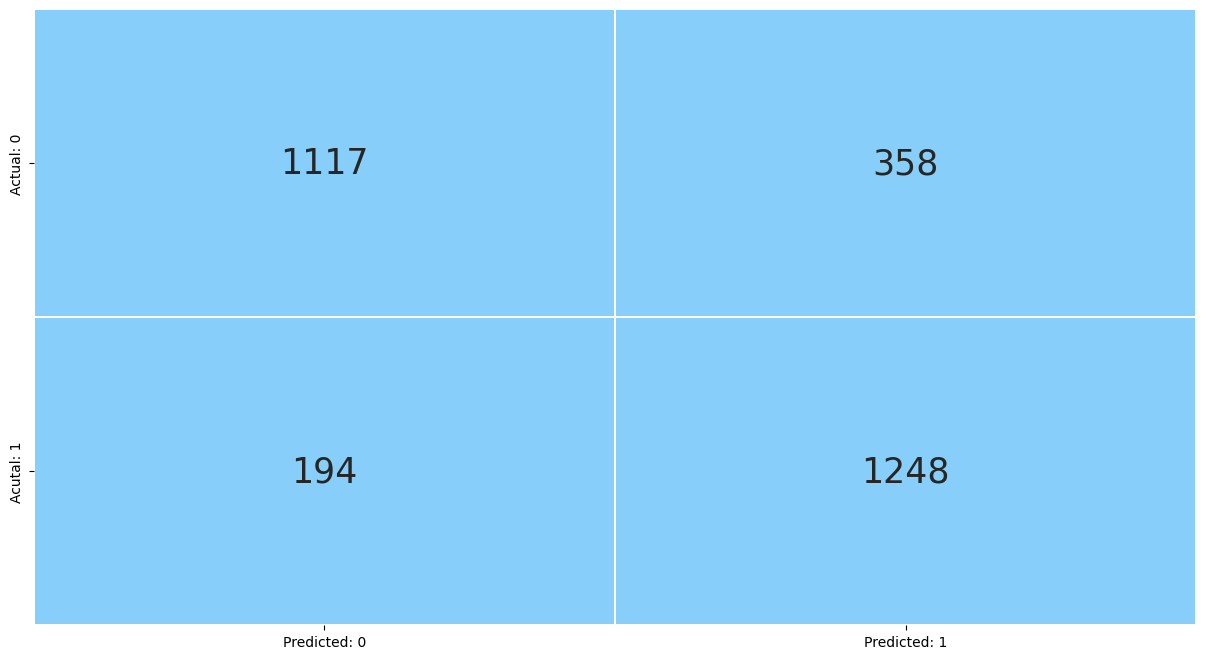

Wall time: 0 ns


In [854]:
# Confusion matrix for 0.43 threshold

cm = confusion_matrix(ytest,ypred_point43)

conf_matrix = pd.DataFrame(cm, columns = ['Predicted: 0','Predicted: 1' ], index = ['Actual: 0','Acutal: 1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, linewidths= 0.1, 
           annot_kws= {'size':25})

plt.show()

%time

After using youden's index, the accuracy have been increased by 1 %

Will try with **DecisionTree classifier**

In [855]:
decision_tree_classification = DecisionTreeClassifier(criterion='gini',random_state=10)

decisiontree_model_gini = decision_tree_classification.fit(xtrain,ytrain)
%time

Wall time: 0 ns


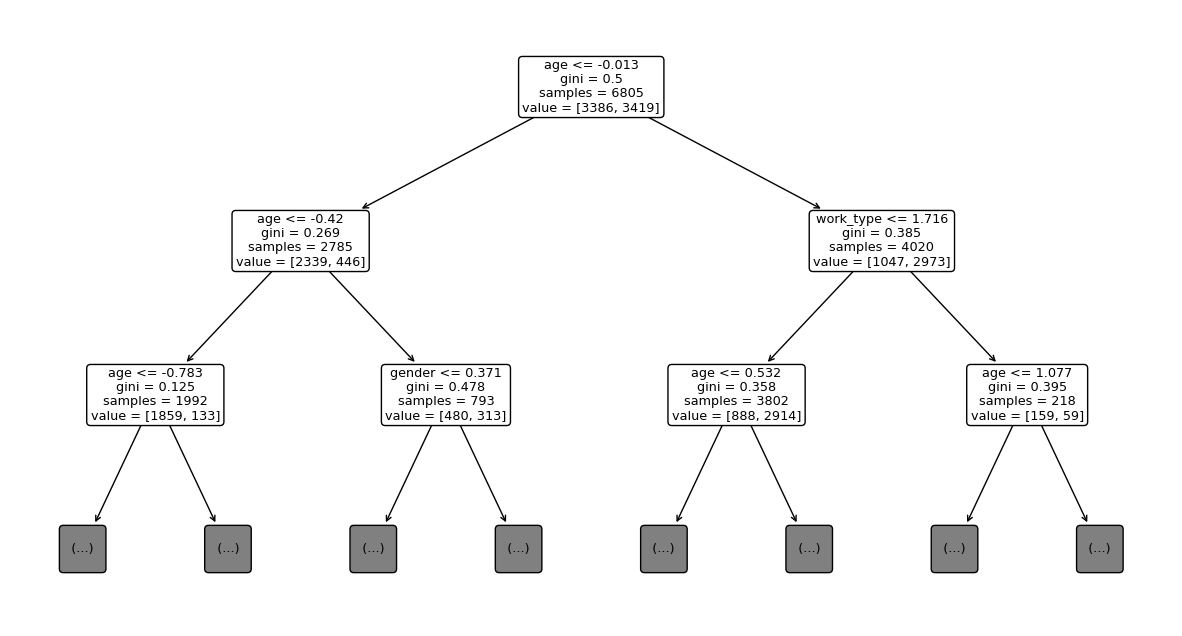

Wall time: 0 ns


In [856]:
tree.plot_tree(decisiontree_model_gini,max_depth=2,feature_names=xtrain.columns,rounded=True)
plt.show()
%time

**Calculate the performance measures on the train set**

In [857]:
pred_train = decisiontree_model_gini.predict(xtrain)
print(classification_report(pred_train,ytrain))
%time

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00      3419

    accuracy                           1.00      6805
   macro avg       1.00      1.00      1.00      6805
weighted avg       1.00      1.00      1.00      6805

Wall time: 0 ns


**Calculate the performance measures on the test set**

In [858]:
pred_test = decisiontree_model_gini.predict(xtest)
print(classification_report(pred_test,ytest))
%time

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1438
           1       0.91      0.89      0.90      1479

    accuracy                           0.90      2917
   macro avg       0.90      0.90      0.90      2917
weighted avg       0.90      0.90      0.90      2917

Wall time: 0 ns


The model is overfitting and when it comes to unseen data it performs less than train data, so will try with some pruning

In [859]:
decision_tree_classification = DecisionTreeClassifier(criterion='entropy',min_samples_leaf= 10, 
                                                      max_depth = 10 ,random_state=10)

decisiontree_model_entropy = decision_tree_classification.fit(xtrain,ytrain)

pred_train = decisiontree_model_entropy.predict(xtrain)
print('Train set:\n',classification_report(pred_train,ytrain))

pred_test = decisiontree_model_gini.predict(xtest)
print('Test set:\n',classification_report(pred_test,ytest))
%time

Train set:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87      2938
           1       0.95      0.84      0.89      3867

    accuracy                           0.88      6805
   macro avg       0.88      0.89      0.88      6805
weighted avg       0.89      0.88      0.88      6805

Test set:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1438
           1       0.91      0.89      0.90      1479

    accuracy                           0.90      2917
   macro avg       0.90      0.90      0.90      2917
weighted avg       0.90      0.90      0.90      2917

Wall time: 0 ns


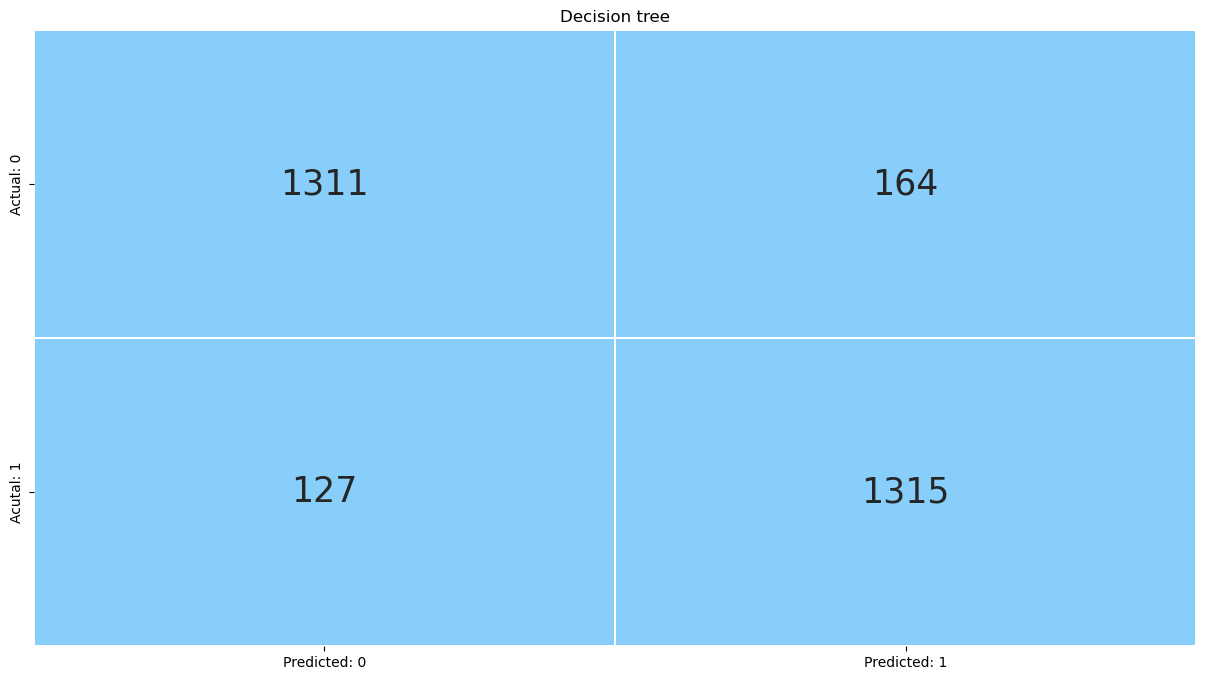

Wall time: 0 ns


In [860]:
cm = confusion_matrix(ytest,pred_test)

conf_matrix = pd.DataFrame(cm, columns = ['Predicted: 0','Predicted: 1' ], index = ['Actual: 0','Acutal: 1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, linewidths= 0.1, 
           annot_kws= {'size':25})

plt.title('Decision tree')
plt.show()
%time

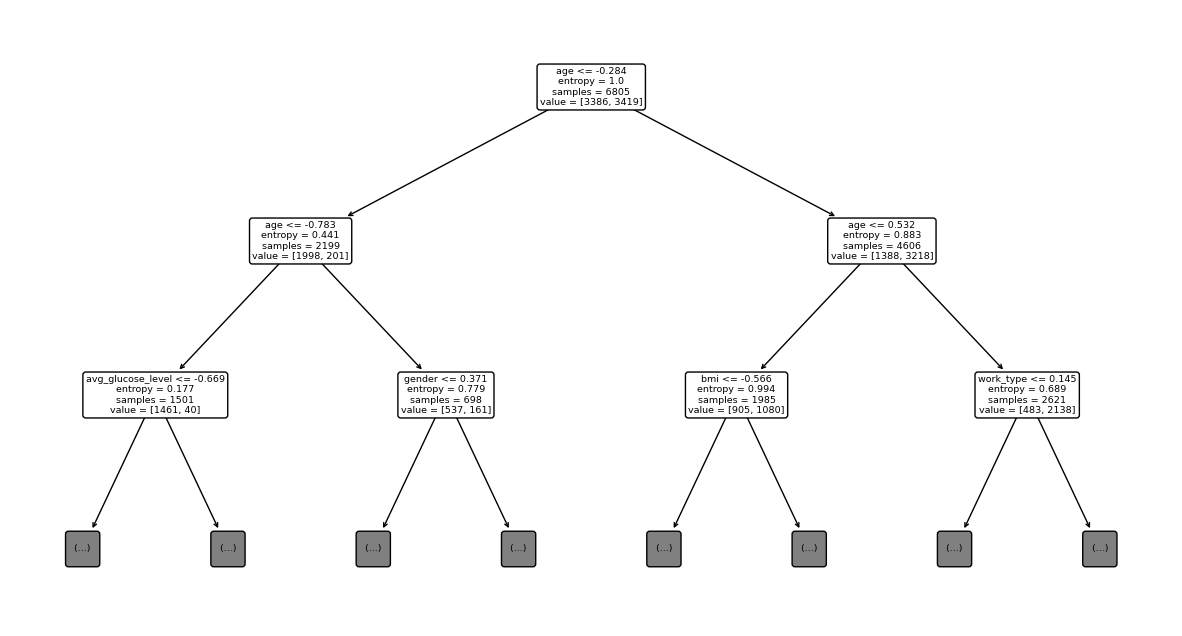

In [861]:
tree.plot_tree(decisiontree_model_entropy,feature_names=xtrain.columns,rounded=True, max_depth=2)
plt.show()

Somehow better than gini model without pruning. But again we will try with randomforest classifier

# RandomForestClassifier

In [862]:
rf_classification = RandomForestClassifier(n_estimators=10, random_state=10)

rf_model = rf_classification.fit(xtrain,ytrain)

pred_train = rf_model.predict(xtrain)
print('Train set:\n\n', classification_report(pred_train,ytrain))

pred_test = rf_model.predict(xtest)
print('Test set:\n\n', classification_report(pred_test,ytest))
%time

Train set:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3387
           1       1.00      1.00      1.00      3418

    accuracy                           1.00      6805
   macro avg       1.00      1.00      1.00      6805
weighted avg       1.00      1.00      1.00      6805

Test set:

               precision    recall  f1-score   support

           0       0.91      0.94      0.93      1421
           1       0.95      0.91      0.93      1496

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917

Wall time: 0 ns


Model is overfitting will try after pruning the parameters

In [863]:
rf_classification = RandomForestClassifier(criterion='entropy',
                                           max_depth=5,
                                           min_samples_leaf=10,
                                           max_leaf_nodes=8,
                                           min_samples_split= 10,
                                           n_estimators=5, 
                                           random_state=100)

rf_model = rf_classification.fit(xtrain,ytrain)

pred_train = rf_model.predict(xtrain)
print('Train set:\n\n', classification_report(pred_train,ytrain))

pred_test = rf_model.predict(xtest)
print('Test set:\n\n', classification_report(pred_test,ytest))

Train set:

               precision    recall  f1-score   support

           0       0.72      0.86      0.78      2819
           1       0.89      0.76      0.82      3986

    accuracy                           0.80      6805
   macro avg       0.80      0.81      0.80      6805
weighted avg       0.82      0.80      0.81      6805

Test set:

               precision    recall  f1-score   support

           0       0.73      0.86      0.79      1251
           1       0.88      0.76      0.81      1666

    accuracy                           0.80      2917
   macro avg       0.80      0.81      0.80      2917
weighted avg       0.81      0.80      0.80      2917



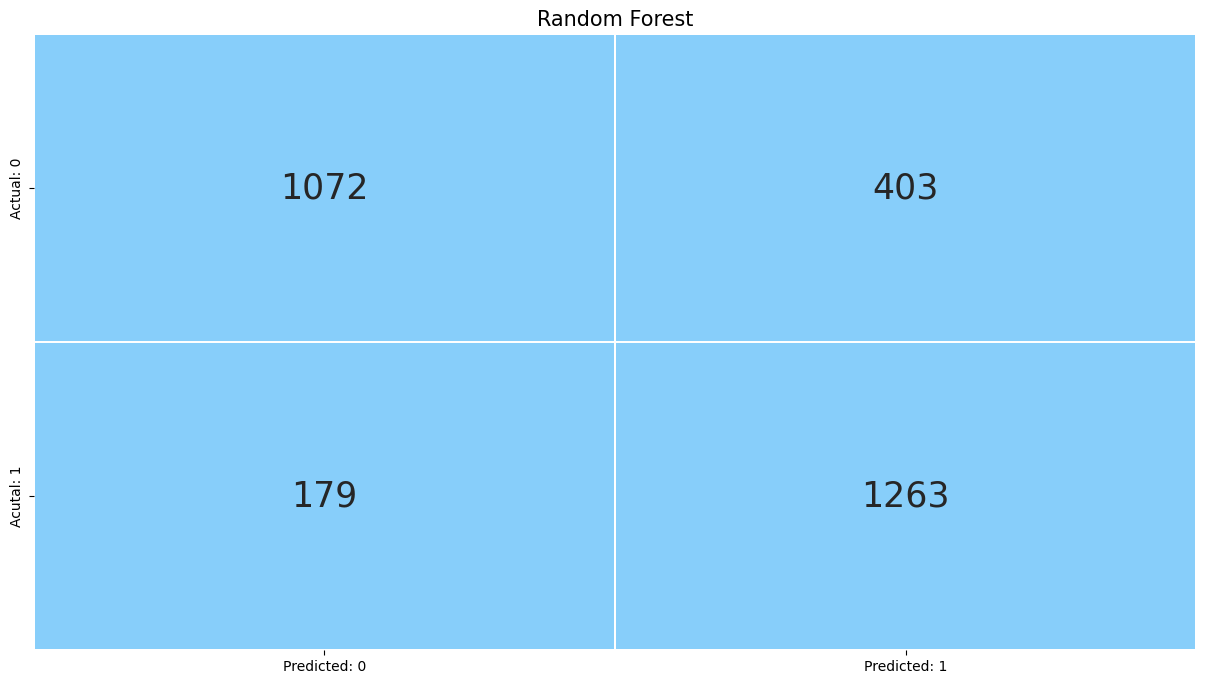

Wall time: 0 ns


In [864]:
cm = confusion_matrix(ytest,pred_test)

conf_matrix = pd.DataFrame(cm, columns = ['Predicted: 0','Predicted: 1' ], index = ['Actual: 0','Acutal: 1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, linewidths= 0.1, 
           annot_kws= {'size':25})

plt.title('Random Forest', fontsize =15)
plt.show()
%time

**Out of all these built models, accuracy on decision tree is more and we can choose that as final model**